In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install graphviz
import graphviz

In [2]:
df = pd.read_csv("testset.csv")

In [3]:
df.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


In [4]:
df[' _conds'].value_counts() 

 _conds
Haze                             47602
Smoke                            20760
Mist                              9375
Clear                             3129
Widespread Dust                   2856
Fog                               2760
Scattered Clouds                  2209
Partly Cloudy                     2091
Shallow Fog                       1860
Mostly Cloudy                     1537
Light Rain                        1302
Partial Fog                       1031
Patches of Fog                     901
Thunderstorms and Rain             486
Heavy Fog                          421
Light Drizzle                      414
Rain                               394
Unknown                            383
Blowing Sand                       378
Overcast                           326
Thunderstorm                       192
Light Thunderstorms and Rain       176
Drizzle                            112
Light Fog                           64
Light Thunderstorm                  64
Heavy Rain       

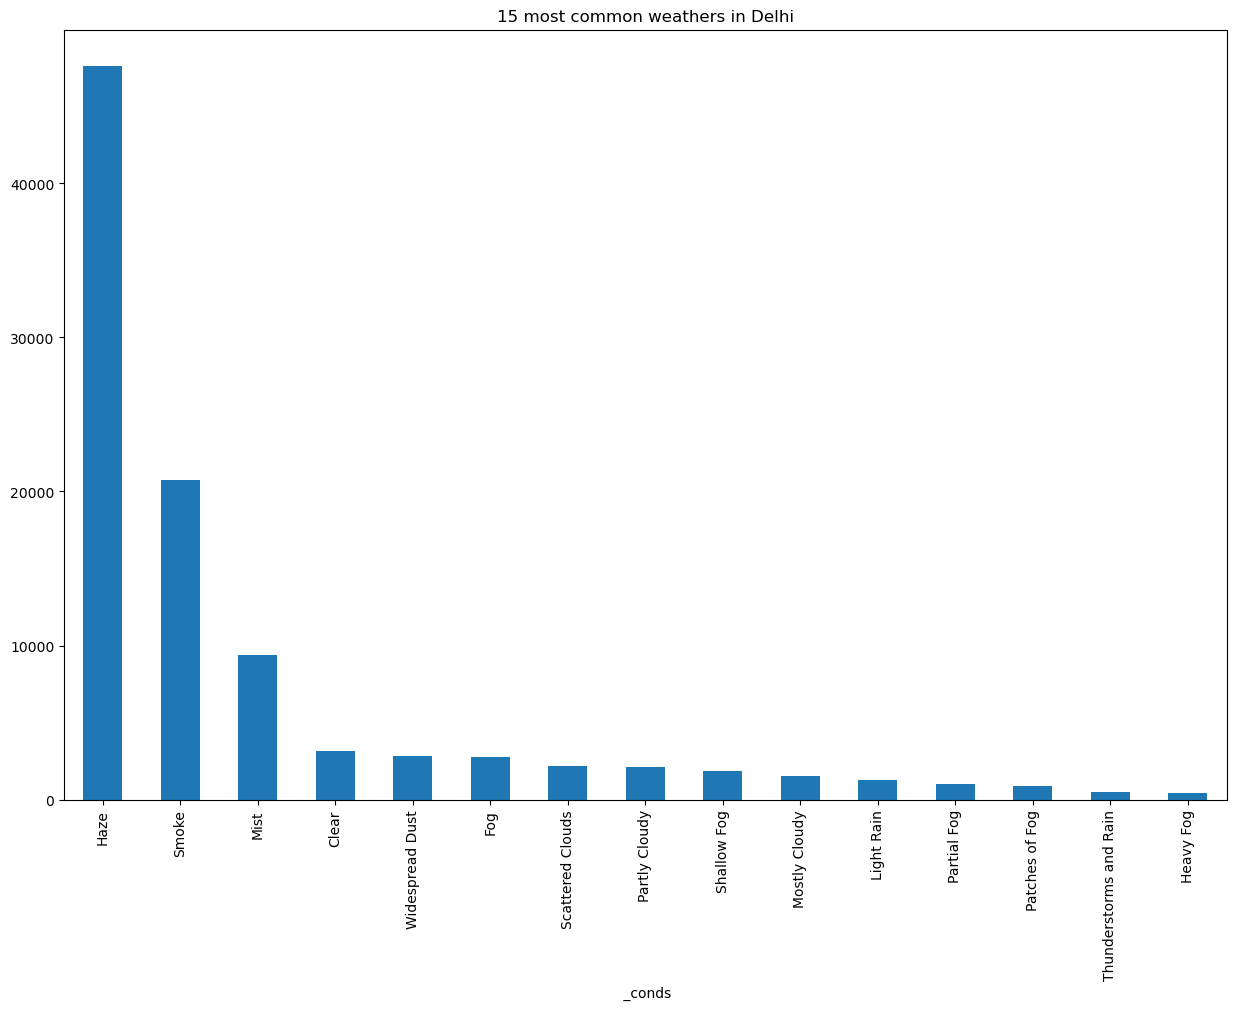

In [5]:
plt.figure(figsize=(15,10))
df[' _conds'].value_counts().head(15).plot(kind='bar')

plt.title('15 most common weathers in Delhi')
plt.show()

### Part 1: A quick analysis of Weather in Delhi

It is clearly visible that Haze and Smoke are most common weatehrs in Delhi

[]

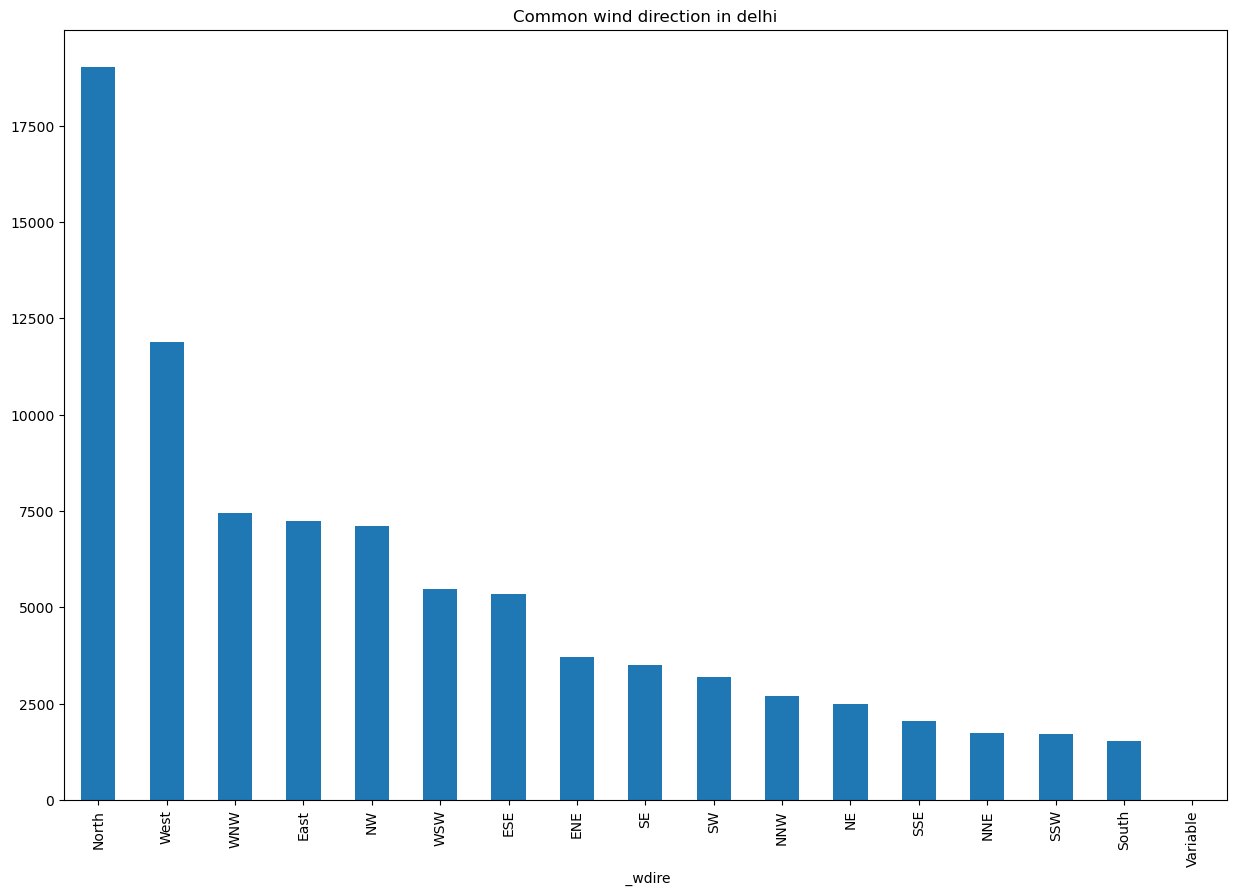

In [6]:
plt.figure(figsize=(15, 10))
plt.title("Common wind direction in delhi")
df[' _wdire'].value_counts().plot(kind="bar")
plt.plot()

North and West are the most common wind directions in dehi.

C:\Users\hp\AppData\Local\Temp\ipykernel_11084\1216561183.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[' _tempm'],bins=[i for i in range(0,61,5)], kde=False)


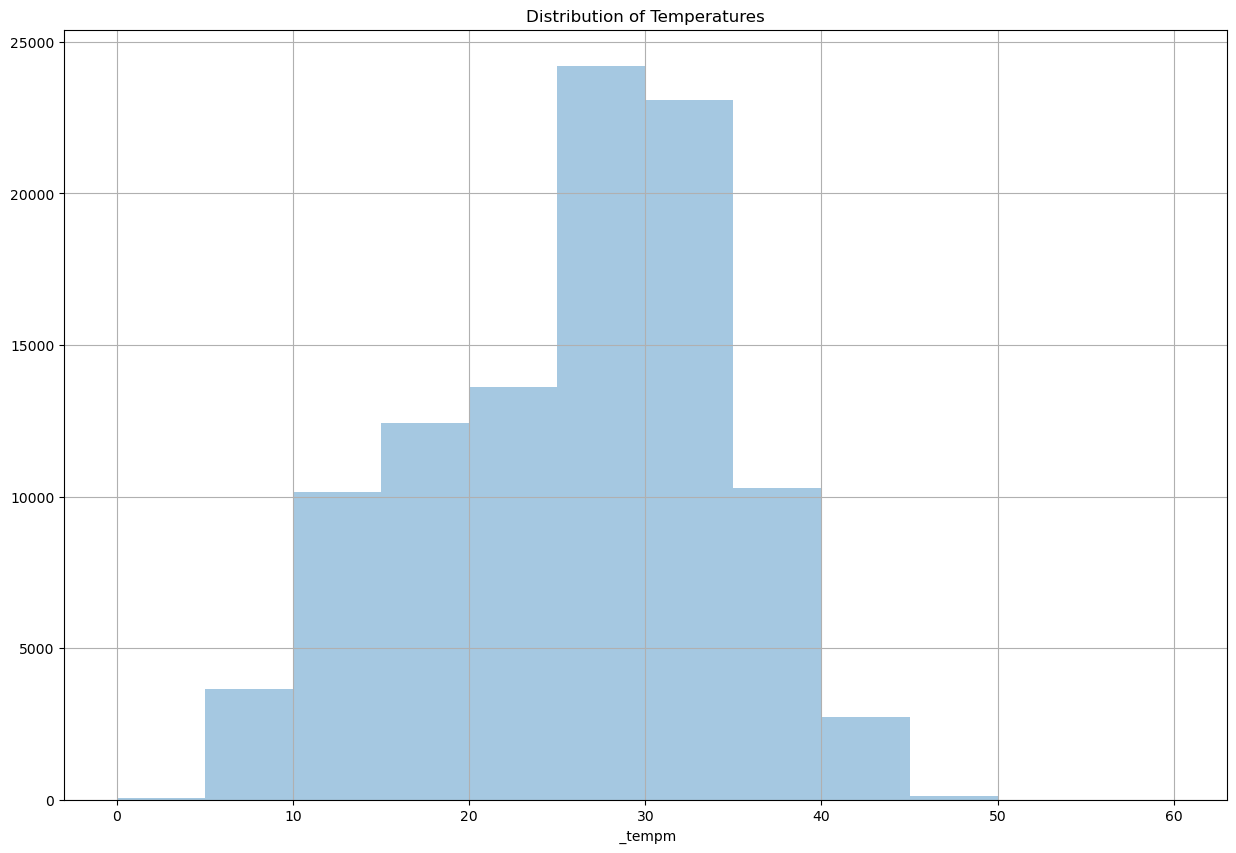

In [7]:
plt.figure(figsize=(15, 10))
sns.distplot(df[' _tempm'],bins=[i for i in range(0,61,5)], kde=False)
plt.title("Distribution of Temperatures")
plt.grid()
plt.show()

Most common temperature scale in Delhi is from 25 to 35 degree.

In [8]:
df['datetime_utc'] = pd.to_datetime(df['datetime_utc'])

In [9]:
df['datetime_utc']

0        1996-11-01 11:00:00
1        1996-11-01 12:00:00
2        1996-11-01 13:00:00
3        1996-11-01 14:00:00
4        1996-11-01 16:00:00
                 ...        
100985   2017-04-24 06:00:00
100986   2017-04-24 09:00:00
100987   2017-04-24 12:00:00
100988   2017-04-24 15:00:00
100989   2017-04-24 18:00:00
Name: datetime_utc, Length: 100990, dtype: datetime64[ns]

In [10]:
df.isna().sum()

datetime_utc         0
 _conds             72
 _dewptm           621
 _fog                0
 _hail               0
 _heatindexm     71835
 _hum              757
 _precipm       100990
 _pressurem        232
 _rain               0
 _snow               0
 _tempm            673
 _thunder            0
 _tornado            0
 _vism            4428
 _wdird          14755
 _wdire          14755
 _wgustm         99918
 _windchillm    100411
 _wspdm           2358
dtype: int64

In [11]:
# imputing the missing value in temperatre feature with mean.
df[' _tempm'].fillna(df[' _tempm'].mean(), inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_11084\3248270873.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[' _tempm'].fillna(df[' _tempm'].mean(), inplace=True)


In [12]:
df[' _tempm'].isna().sum()
# filled all missing values with mean()


0

In [13]:
str(df['datetime_utc'][0])

'1996-11-01 11:00:00'

In [14]:
# a function to extract year part from the whole date
def get_year(x):
  return x[0:4]

In [15]:
# a function to extract month part from the whole date
def get_month(x):
  return x[5:7]

In [16]:
df['year'] = df['datetime_utc'].apply(lambda x: get_year(str(x)))
df['month'] = df['datetime_utc'].apply(lambda x: get_month(str(x)))

In [17]:
df['year']

0         1996
1         1996
2         1996
3         1996
4         1996
          ... 
100985    2017
100986    2017
100987    2017
100988    2017
100989    2017
Name: year, Length: 100990, dtype: object

In [18]:
temp_year = pd.crosstab(df['year'], df['month'], values=df[' _tempm'], aggfunc='mean')

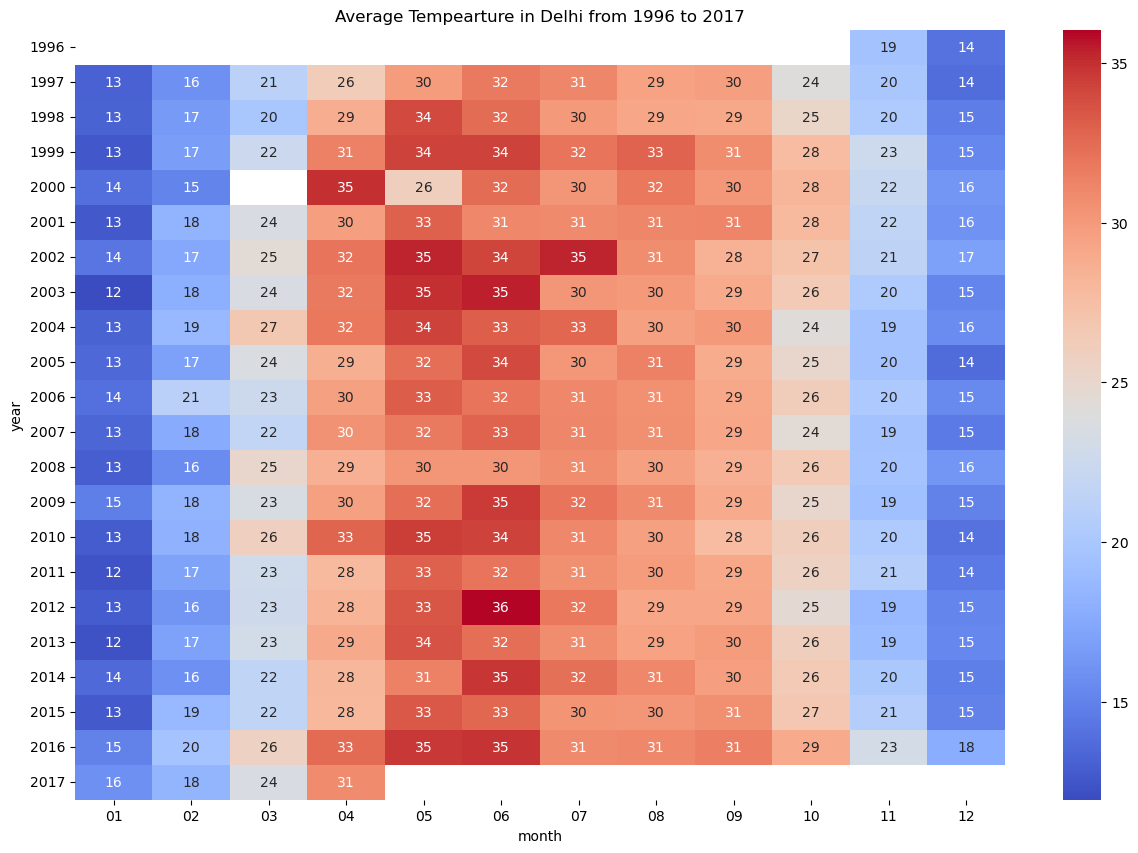

In [19]:
plt.figure(figsize=(15, 10))
sns.heatmap(temp_year, cmap='coolwarm', annot=True)
plt.title("Average Tempearture in Delhi from 1996 to 2017")
plt.show()

In [20]:
df[' _hum'].isna().sum()

757

In [21]:
# imputing missing values in _hum feature with mean
df[' _hum'].fillna(df[' _hum'].mean(), inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_11084\2694068701.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[' _hum'].fillna(df[' _hum'].mean(), inplace=True)


In [22]:
humidity_year = pd.crosstab(df['year'], df['month'], values=df[' _hum'], aggfunc='mean')

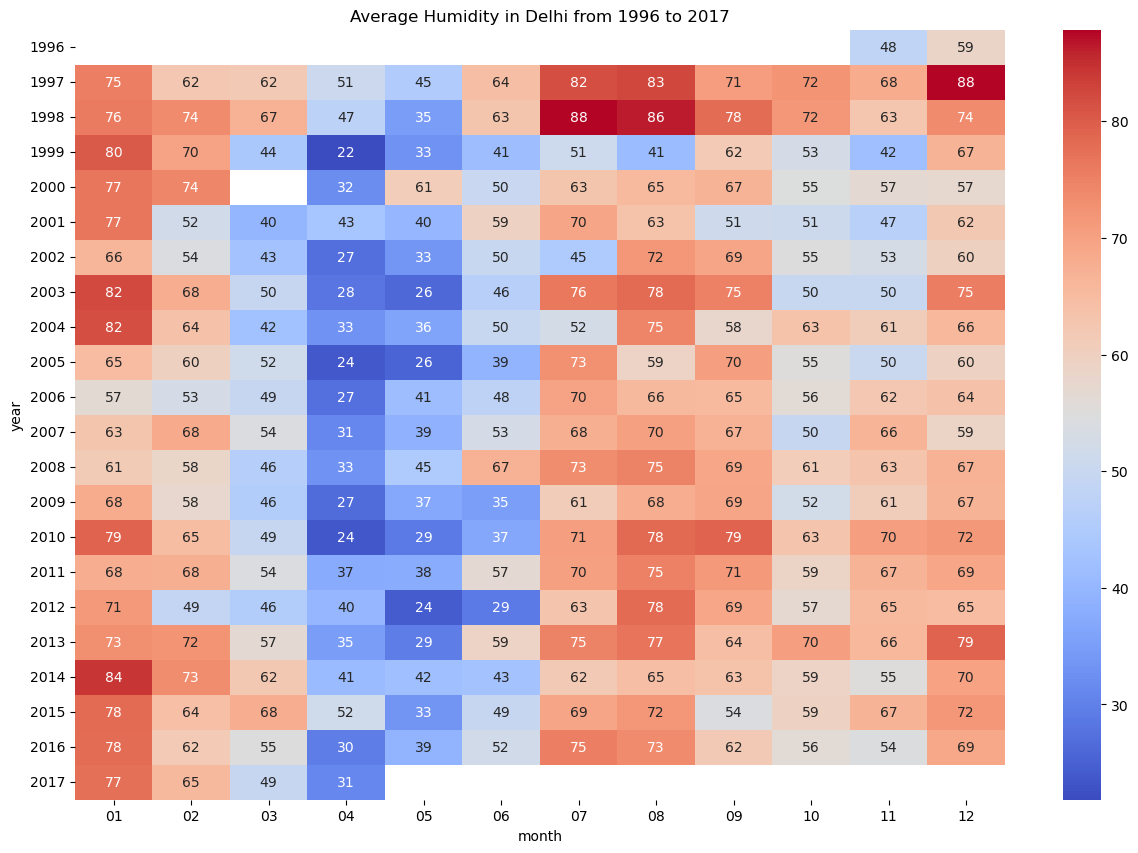

In [23]:
plt.figure(figsize=(15, 10))
sns.heatmap(humidity_year, cmap='coolwarm', annot=True)
plt.title("Average Humidity in Delhi from 1996 to 2017")
plt.show()


# Time Series Forecasting

In [24]:
# taking only temperature feature as values and datetime feature as index in the dataframe for time series forecasting of temperature
data = pd.DataFrame(list(df[' _tempm']), index=df['datetime_utc'], columns=['temp'])

In [25]:
data

,temp
datetime_utc,
1996-11-01 11:00:00,30.0
1996-11-01 12:00:00,28.0
1996-11-01 13:00:00,24.0
1996-11-01 14:00:00,24.0
1996-11-01 16:00:00,23.0
...,...
2017-04-24 06:00:00,34.0
2017-04-24 09:00:00,38.0
2017-04-24 12:00:00,36.0


In [26]:
data = data.resample('D').mean()

In [27]:
data.temp.isna().sum()

141

In [28]:
data.fillna(data['temp'].mean(), inplace=True)

In [29]:
data.temp.isna().sum()

0

In [30]:
data.shape

(7480, 1)

In [31]:
data

,temp
datetime_utc,
1996-11-01,22.333333
1996-11-02,22.916667
1996-11-03,21.791667
1996-11-04,22.722222
1996-11-05,27.800000
...,...
2017-04-20,34.500000
2017-04-21,34.250000
2017-04-22,32.900000


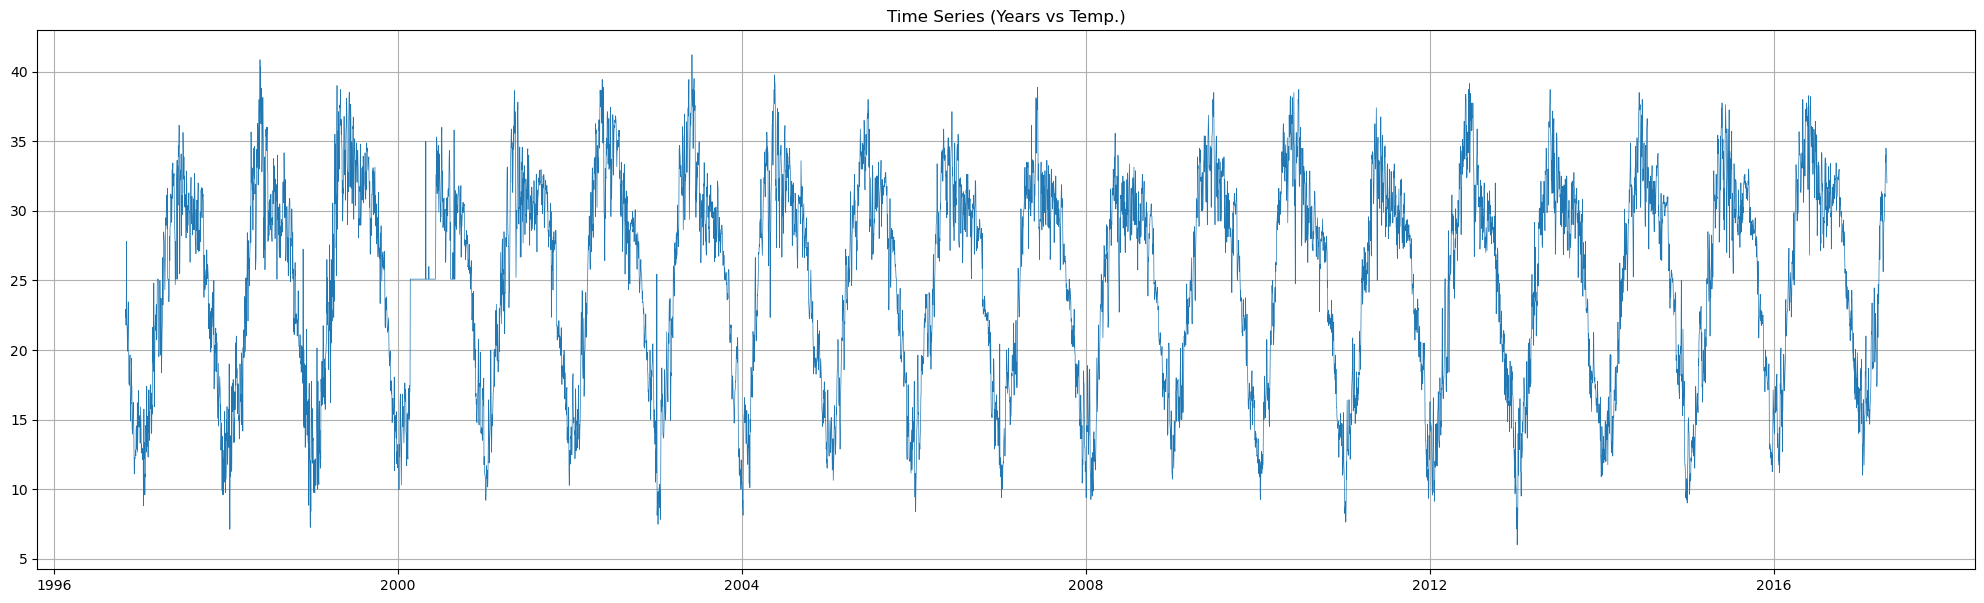

In [32]:
plt.figure(figsize=(25, 7))
plt.plot(data, linewidth=.5)
plt.grid()
plt.title("Time Series (Years vs Temp.)")
plt.show()

In [33]:
# Scaling data to get rid of outliers
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler(feature_range=(-1,1))
data_scaled = scalar.fit_transform(data)

In [34]:
data_scaled

array([[-0.07224714],
       [-0.0391131 ],
       [-0.10301445],
       ...,
       [ 0.52795217],
       [ 0.52653214],
       [ 0.47683109]])

In [35]:
data_scaled.shape

(7480, 1)

In [36]:
timestep = 30
X= []
Y=[]
for i in range(len(data_scaled)- (timestep)):
    X.append(data_scaled[i:i+timestep])
    Y.append(data_scaled[i+timestep])

In [37]:
X=np.asanyarray(X)
Y=np.asanyarray(Y)

In [38]:
k = 7300
Xtrain = X[:k,:,:]
Xtest = X[k:,:,:]    
Ytrain = Y[:k]    
Ytest= Y[k:] 

In [39]:
X.shape

(7450, 30, 1)

In [40]:
Xtrain.shape

(7300, 30, 1)

In [41]:
from tensorflow.keras.layers import Dense,RepeatVector, LSTM, Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.models import Sequential

In [42]:
from tensorflow.keras.layers import Bidirectional, Dropout

In [43]:
model = Sequential()
model.add(Conv1D(filters=256, kernel_size=2, activation='relu', input_shape=(30,1)))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(RepeatVector(30))
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=100, return_sequences=True))
model.add(Bidirectional(LSTM(128, activation='relu')))
model.add(Dense(100, activation='relu'))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
history = model.fit(Xtrain,Ytrain,epochs=300, verbose=1 )

G:\Python code\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/300
229/229 ━━━━━━━━━━━━━━━━━━━━ 75s 157ms/step - loss: 0.0311
Epoch 2/300
229/229 ━━━━━━━━━━━━━━━━━━━━ 36s 156ms/step - loss: 0.0135
Epoch 3/300
229/229 ━━━━━━━━━━━━━━━━━━━━ 37s 161ms/step - loss: 0.0111
Epoch 4/300
229/229 ━━━━━━━━━━━━━━━━━━━━ 36s 157ms/step - loss: 0.0107
Epoch 5/300
229/229 ━━━━━━━━━━━━━━━━━━━━ 36s 156ms/step - loss: 0.0109
Epoch 6/300
229/229 ━━━━━━━━━━━━━━━━━━━━ 37s 159ms/step - loss: 0.0102
Epoch 7/300
229/229 ━━━━━━━━━━━━━━━━━━━━ 40s 172ms/step - loss: 0.0104
Epoch 8/300
229/229 ━━━━━━━━━━━━━━━━━━━━ 42s 183ms/step - loss: 0.0102
Epoch 9/300
229/229 ━━━━━━━━━━━━━━━━━━━━ 42s 183ms/step - loss: 0.0098
Epoch 10/300
229/229 ━━━━━━━━━━━━━━━━━━━━ 44s 191ms/step - loss: 0.0092
Epoch 11/300
229/229 ━━━━━━━━━━━━━━━━━━━━ 40s 173ms/step - loss: 0.0094
Epoch 12/300
229/229 ━━━━━━━━━━━━━━━━━━━━ 38s 165ms/step - loss: 0.0097
Epoch 13/300
229/229 ━━━━━━━━━━━━━━━━━━━━ 39s 169ms/step - loss: 0.0101
Epoch 14/300
229/229 ━━━━━━━━━━━━━━━━━━━━ 37s 163ms/step - loss: 0.0094
E

In [44]:
model.save("./regressor.hdf5")

In [45]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png')

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [46]:
predict = model.predict(Xtest)

5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 491ms/step


In [47]:
predict = scalar.inverse_transform(predict)

In [48]:
Ytesting = scalar.inverse_transform(Ytest)

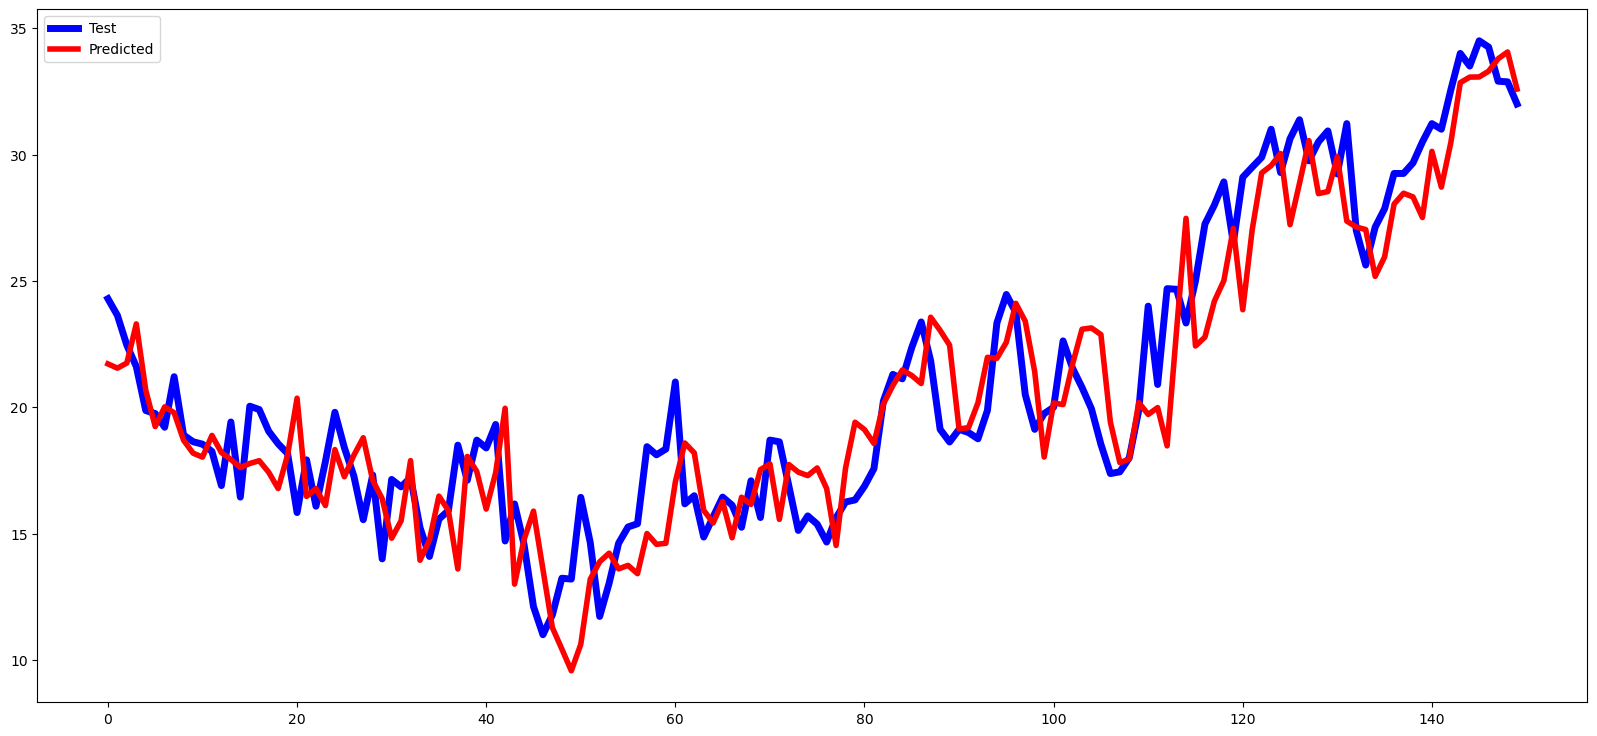

In [49]:
plt.figure(figsize=(20,9))
plt.plot(Ytesting , 'blue', linewidth=5)
plt.plot(predict,'r' , linewidth=4)
plt.legend(('Test','Predicted'))
plt.show()

In [50]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Ytesting, predict)

4.990902976224929

In [51]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

# MSE and RMSE
mse = mean_squared_error(Ytesting, predict)
rmse = mse ** 0.5

# MAPE and Accuracy
mape = mean_absolute_percentage_error(Ytesting, predict) * 100
accuracy_mape = 100 - mape

# R^2 Score
r2 = r2_score(Ytesting, predict)

# Print all metrics
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Approximate Accuracy (100 - MAPE): {accuracy_mape:.2f}%")
print(f"R^2 Score: {r2:.2f}")


Mean Squared Error (MSE): 4.99
Root Mean Squared Error (RMSE): 2.23
Mean Absolute Percentage Error (MAPE): 9.27%
Approximate Accuracy (100 - MAPE): 90.73%
R^2 Score: 0.85


In [52]:
from sklearn.metrics import mean_absolute_percentage_error

mape = mean_absolute_percentage_error(Ytesting, predict) * 100  # Convert to percentage
accuracy = 100 - mape  # Approximate accuracy
print(f"Model Accuracy: {accuracy:.2f}%")

Model Accuracy: 90.73%
